In [6]:
import pandas as pd
import numpy as np
import gymnasium as gym
from collections import defaultdict
import matplotlib.pyplot as plt

In [3]:
env = gym.make("Taxi-v3")
state,info = env.reset()

In [4]:
env.action_space

Discrete(6)

In [5]:
env.observation_space.n

500

In [7]:
def e_greedy(Q,state,epsilon):
    if np.random.rand() < epsilon:
        action = np.random.choice(env.action_space.n)
    else:
        action = np.argmax(Q[state])
    return action

In [21]:
def sarsa(env,num_episodes,epsilon=0.1,alpha=0.4,gamma=1.0):
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    rewards = []
    
    for i in range(num_episodes):
        done = False
        state,_ = env.reset()
        action = e_greedy(Q,state,epsilon)

        total_reward = 0
        while not done:
            next_state,reward,terminated,truncated,_ = env.step(action)
            next_action = e_greedy(Q,state,epsilon)
            Q[state][action] += alpha*(reward + gamma*Q[next_state][action] - Q[state][action])
            total_reward+=reward
            state=next_state
            action=next_action
            done = terminated or truncated
        rewards.append(total_reward)
    return rewards

In [ ]:
def expected_sarsa(env,num_episodes,epsilon=0.1,alpha=0.4,gamma=1.0):
    Q = defaultdict(lambda:np.zeros(env.action_space.n))
    rewards = []
    nA = env.action_space.n
    for i in range(num_episodes):
        done = False
        state,_ = env.reset()
        action = e_greedy(Q,state,epsilon)
        
        total_reward = 0
        while not done:
            next_state,reward,terminated,truncated,_ = env.step(action)
            next_action = e_greedy(Q,state,epsilon)
            action_probs = np.ones(nA)*(epsilon/nA)
            best_action = np.argmax(Q[next_state])
            action_probs[best_action]+=1-epsilon
            expected_Q = np.dot(Q[next_state],action_probs)
            
            Q[state][action]+= alpha * (reward + gamma * expected_Q  - Q[state][action])
            total_reward +=reward
            state = next_state
            action = next_action
            done = truncated or terminated
        rewards.append(total_reward)
    return rewards

In [27]:
rewards = sarsa(env,100)
es_rewards = expected_sarsa(env,100)

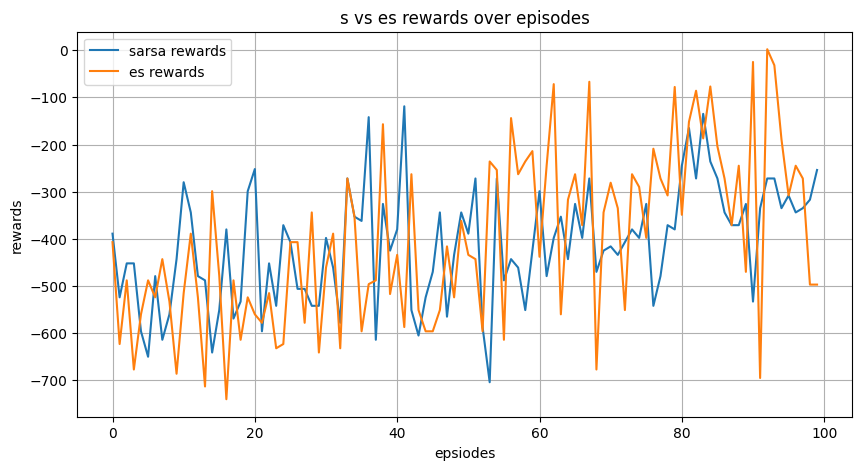

In [28]:
plt.figure(figsize=(10,5))
plt.plot(rewards,label="sarsa rewards")
plt.plot(es_rewards,label="es rewards")
plt.xlabel("epsiodes")
plt.ylabel("rewards")
plt.title("s vs es rewards over episodes")
plt.grid(True)
plt.legend()
plt.show()